# ECON 425 HW8
February 29, 2024

Due Thu, Mar 7, 6pm in Bruinlearn

### Problem 1 
#### Use the dataset ‘marketing-campaign.csv’ uploaded on Canvas (description can be found here: https://archive.ics.uci.edu/dataset/222/bank+marketing). Convert categorical variables of you choice (you need not use all of them) into dummies and allocate a third of your data to the testing sample.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#decision tree
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
df = pd.read_csv('W8_marketing_campaign.csv', sep=';')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
#combine variable day and month
df['date'] = df['day'].astype(str) + '-' + df['month']
#drop the original columns
df = df.drop(['day', 'month'], axis=1)

#convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'date', 'poutcome'])


#Standardize the numerical variables
scaler = StandardScaler()
std_data = df.copy()
num_vars = ['age', 'balance','duration', 'campaign', 'pdays', 'previous']
std_data[num_vars] = scaler.fit_transform(std_data[num_vars])

In [17]:
df

,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,date_9-jun,date_9-mar,date_9-may,date_9-nov,date_9-oct,date_9-sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,no,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,44,29,151,1,-1,0,no,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,33,2,76,1,-1,0,no,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,47,1506,92,1,-1,0,no,False,True,False,...,False,False,False,False,False,False,False,False,False,True
4,33,1,198,1,-1,0,no,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,yes,False,False,False,...,False,False,False,False,False,False,False,False,False,True
45207,71,1729,456,2,-1,0,yes,False,False,False,...,False,False,False,False,False,False,False,False,False,True
45208,72,5715,1127,5,184,3,yes,False,False,False,...,False,False,False,False,False,False,False,False,True,False
45209,57,668,508,4,-1,0,no,False,True,False,...,False,False,False,False,False,False,False,False,False,True


### (i) First, suppose each tree in a random forest picks a random subset of 𝑚 = √𝑝 features at each split, where 𝑝 is the number of features in the data. On the training sample, fit the random forest to predict subscription to a term deposit. Vary the number of trees in the range {1, 2, 3, 4, 5, 10, 20, 50}. Plot accuracy, precision, recall, and F1 score on the testing sample against the number of trees.


In [37]:
def create_random_forest(X_train, y_train, n_estimators=100,
                         max_depth = None,
                         max_features='sqrt'
                         ,random_state=69):
    # Create the random forest classifier
    print("n estimators: ", n_estimators)
    print("max features: ", max_features)
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth, 
                                random_state=random_state,
                                max_features=max_features)
    
    # Fit the model to the training data
    rf.fit(X_train, y_train)
    
    # Return the trained model
    return rf


In [38]:
def rf_tree_number(tree_number):
    X = std_data.drop('y', axis=1)
    y = std_data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=42)
    rf = create_random_forest(X_train, y_train,n_estimators=tree_number,max_features='sqrt')
    X_predicted_rf = rf.predict(X_test)
    print("Accuracy:\n ", accuracy_score(y_test, X_predicted_rf))
    print("Confusion Matrix: \n", confusion_matrix(y_test, X_predicted_rf))
    print("Classification Report:\n ", classification_report(y_test, X_predicted_rf))
    return rf, 

In [39]:
for i in [1,2,3,4,5,10,20,50]:
    print("Random Forest with ", i, " trees")
    rf_tree_number(i)
    print("\n\n")


Random Forest with  1  trees
n estimators:  1
max features:  sqrt
Accuracy:
  0.8726030124079358
Confusion Matrix: 
 [[12441   868]
 [ 1052   710]]
Classification Report:
                precision    recall  f1-score   support

          no       0.92      0.93      0.93     13309
         yes       0.45      0.40      0.43      1762

    accuracy                           0.87     15071
   macro avg       0.69      0.67      0.68     15071
weighted avg       0.87      0.87      0.87     15071




Random Forest with  2  trees
n estimators:  2
max features:  sqrt
Accuracy:
  0.8897219826156194
Confusion Matrix: 
 [[13042   267]
 [ 1395   367]]
Classification Report:
                precision    recall  f1-score   support

          no       0.90      0.98      0.94     13309
         yes       0.58      0.21      0.31      1762

    accuracy                           0.89     15071
   macro avg       0.74      0.59      0.62     15071
weighted avg       0.87      0.89      0.87     1507

### (ii) Repeat (i) with bagging, i.e. 𝑚 = 𝑝.


In [50]:
def rf_bagging_tree_number(tree_number):
    X = std_data.drop('y', axis=1)
    y = std_data['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=42)
    rf = create_random_forest(X_train, y_train,n_estimators=tree_number,max_features=None)
    X_predicted_rf = rf.predict(X_test)
    print("Accuracy:\n ", accuracy_score(y_test, X_predicted_rf))
    print("Confusion Matrix: \n", confusion_matrix(y_test, X_predicted_rf))
    print("Classification Report:\n ", classification_report(y_test, X_predicted_rf))
    return rf,


In [51]:
for i in [1,2,3,4,5,10,20,50]:
    print("Bagging with ", i, " trees")
    rf_bagging_tree_number(i)
    print("\n\n")

Bagging with  1  trees
n estimators:  1
max features:  None
Accuracy:
  0.8775131046380465
Confusion Matrix: 
 [[12438   871]
 [  975   787]]
Classification Report:
                precision    recall  f1-score   support

          no       0.93      0.93      0.93     13309
         yes       0.47      0.45      0.46      1762

    accuracy                           0.88     15071
   macro avg       0.70      0.69      0.70     15071
weighted avg       0.87      0.88      0.88     15071




Bagging with  2  trees
n estimators:  2
max features:  None
Accuracy:
  0.892243381328379
Confusion Matrix: 
 [[12939   370]
 [ 1254   508]]
Classification Report:
                precision    recall  f1-score   support

          no       0.91      0.97      0.94     13309
         yes       0.58      0.29      0.38      1762

    accuracy                           0.89     15071
   macro avg       0.75      0.63      0.66     15071
weighted avg       0.87      0.89      0.88     15071




Bagging

### (iii) Pick the best-performing model and use the feature_importances_ attribute of RandomForestClassifier to evaluate importance of different features. Is there a clearly dominating feature? Explain.


The best-performing model is Random Forest with  50  trees (max features:  sqrt)

Accuracy: 0.903191559949572

There is indeed a dominating feature, which is duration. This feature means the last contact duration, in seconds (numeric), which is considered impartant in making marketing campaigns, as the longer the contact duration goes, the higher the possiblity the bank achieve its goal with potential clients.



In [67]:
# List of accuracy scores for different models
accuracy_scores = []

# Train random forest models with different numbers of trees
for i in [1, 2, 3, 4, 5, 10, 20, 50]:
    X = std_data.drop('y', axis=1)
    y = std_data['y'] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=42)

    rf_model = create_random_forest(X_train, y_train, n_estimators=i, max_features='sqrt')
    X_predicted_rf = rf_model.predict(X_test)
    print("Accuracy:\n ", accuracy_score(y_test, X_predicted_rf))
    accuracy_scores.append(accuracy_score(y_test, X_predicted_rf))

    rf_model_bagging = create_random_forest(X_train, y_train, n_estimators=i, max_features=None)
    X_predicted_rf_bagging = rf_model_bagging.predict(X_test)
    print("Accuracy:\n ", accuracy_score(y_test, X_predicted_rf_bagging))
    accuracy_scores.append(accuracy_score(y_test, X_predicted_rf_bagging))




n estimators:  1
max features:  sqrt
Accuracy:
  0.8726030124079358
n estimators:  1
max features:  None
Accuracy:
  0.8775131046380465
n estimators:  2
max features:  sqrt
Accuracy:
  0.8897219826156194
n estimators:  2
max features:  None
Accuracy:
  0.892243381328379
n estimators:  3
max features:  sqrt
Accuracy:
  0.8900537456041404
n estimators:  3
max features:  None
Accuracy:
  0.886603410523522
n estimators:  4
max features:  sqrt
Accuracy:
  0.8944993696503218
n estimators:  4
max features:  None
Accuracy:
  0.8940349014663924
n estimators:  5
max features:  sqrt
Accuracy:
  0.8962908897883353
n estimators:  5
max features:  None
Accuracy:
  0.891248092362816
n estimators:  10
max features:  sqrt
Accuracy:
  0.9006701612368124
n estimators:  10
max features:  None
Accuracy:
  0.8980824099263486
n estimators:  20
max features:  sqrt
Accuracy:
  0.9014000398115586
n estimators:  20
max features:  None
Accuracy:
  0.8993431092827284
n estimators:  50
max features:  sqrt
Accuracy:

In [64]:
print(accuracy_scores.index(max(accuracy_scores)))

best_model = create_random_forest(std_data.drop('y', axis=1), std_data['y'], n_estimators=50, max_features='sqrt')
feature_importances = best_model.feature_importances_


14
n estimators:  50
max features:  sqrt


In [65]:
imporance = zip(std_data.drop('y', axis=1).columns, feature_importances)
importance = pd.DataFrame(imporance, columns=['feature', 'importance'])
importance = importance.sort_values(by='importance', ascending=False)


In [66]:
importance.head(10)

,feature,importance
2,duration,0.227258
1,balance,0.082158
0,age,0.079048
354,poutcome_success,0.042099
3,campaign,0.033877
4,pdays,0.030283
5,previous,0.017938
28,housing_yes,0.011977
355,poutcome_unknown,0.010616
27,housing_no,0.010189


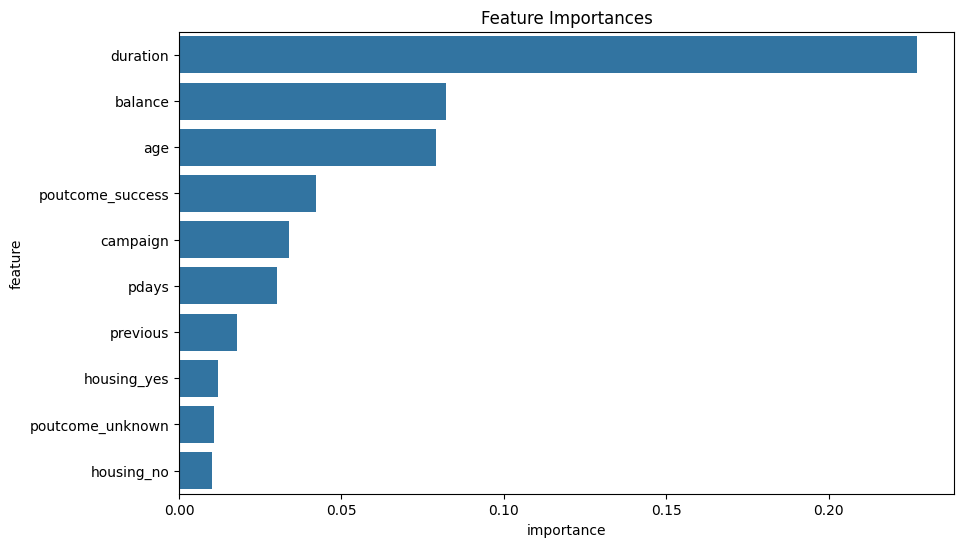

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance.head(10), x='importance', y='feature')
plt.title('Feature Importances')
plt.show()


    

### (iv) Beyond sampling variation, is there any other explanation for the alternating pattern in some performance metrics arising when the number of trees is very small?

The alternating pattern in some performance metrics when the number of trees is very small can be attributed to the randomness introduced by the random forest algorithm. When the number of trees is small, the individual trees in the random forest may have a higher degree of variability in their predictions. This variability can lead to fluctuations in the performance metrics, resulting in an alternating pattern. As the number of trees increases, the randomness is averaged out, leading to more stable and consistent performance metrics.

In [75]:
accuracy_scores_rf = [accuracy_scores[i] for i in [0,2,4,6,8,10,12,14]]
accuracy_scores_bagging = [accuracy_scores[i] for i in [1,3,5,7,9,11,13,15]]

[0.8726030124079358,
 0.8897219826156194,
 0.8900537456041404,
 0.8944993696503218,
 0.8962908897883353,
 0.9006701612368124,
 0.9014000398115586,
 0.903191559949572]

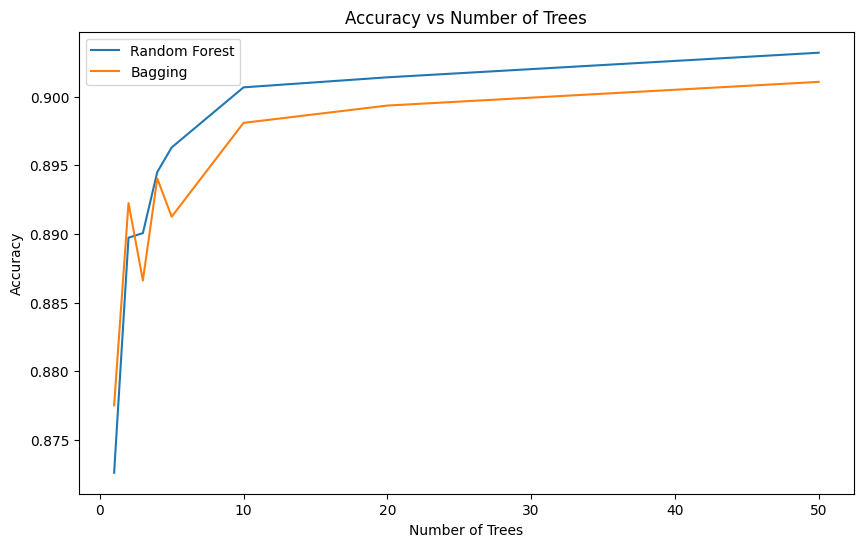

In [77]:
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4, 5, 10, 20, 50], accuracy_scores_rf, label='Random Forest')
plt.plot([1, 2, 3, 4, 5, 10, 20, 50], accuracy_scores_bagging, label='Bagging')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees')
plt.legend()
plt.show()